In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
credit_card = pd.read_csv("drive/MyDrive/Data/creditcard.csv")

In [ ]:
credit_card

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
credit_card.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
credit_card.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
X = credit_card.drop('Class', axis = 1)
y = credit_card['Class']

In [ ]:
# Split the data into train, validation & test sets
train_split = round(0.5 * len(credit_card)) # 50% of data
valid_split = round(train_split + 0.2 * len(credit_card)) # 20% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

In [ ]:
# normalization
mean = X_train.mean(axis=0)
X_train -= mean

std = X_train.std(axis=0)

X_train /= std
X_test -= mean
X_test /= std
X_valid -= mean
X_valid /= std

In [ ]:
len(X_train),len(y_train)

(142404, 142404)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
def build_model(fun):
    model.add(layers.Dense(10, activation=fun, input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(8, activation=fun))
    model.add(layers.Dense(6, activation=fun))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
build_model('relu').summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
partial_x_train = tf.constant(X_train)
partial_y_train = tf.constant(y_train)
partial_x_valid = tf.constant(X_valid)
partial_y_valid = tf.constant(y_valid)

In [ ]:
model = build_model('relu')
history = model.fit(partial_x_train[:5000], partial_y_train[:5000],
                    validation_data=(partial_x_valid[:3000], partial_y_valid[:3000]),
                    epochs=100, batch_size=1, verbose=0)

In [ ]:
history.history['val_loss']

[0.08453294634819031,
 0.08510572463274002,
 0.08343107998371124,
 0.08410252630710602,
 0.08348763734102249,
 0.08179918676614761,
 0.08209194242954254,
 0.08155754953622818,
 0.08024127036333084,
 0.07952147722244263,
 0.07890915125608444,
 0.07787256687879562,
 0.07610999792814255,
 0.07602794468402863,
 0.07594645768404007,
 0.07620619237422943,
 0.07487640529870987,
 0.07423211634159088,
 0.07303328812122345,
 0.0718500167131424,
 0.07117192447185516,
 0.07050342112779617,
 0.06875542551279068,
 0.06673773378133774,
 0.0654786229133606,
 0.06319860368967056,
 0.06168174743652344,
 0.05933425948023796,
 0.05787511542439461,
 0.05729835107922554,
 0.05418819189071655,
 0.05270214378833771,
 0.051640111953020096,
 0.051568735390901566,
 0.0522201806306839,
 0.05065970495343208,
 0.04961481690406799,
 0.04811004549264908,
 0.048239871859550476,
 0.047457825392484665,
 0.04623905569314957,
 0.04576609656214714,
 0.045524902641773224,
 0.0458410270512104,
 0.04630475863814354,
 0.046557

In [ ]:
history.history['val_accuracy']

[0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918937683,
 0.9959999918

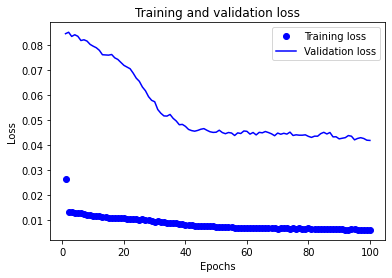

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = build_model('relu')
history = model.fit(partial_x_train[:5000], partial_y_train[:5000],
                    validation_data=(partial_x_valid[:3000], partial_y_valid[:3000]),
                    epochs=42, batch_size=1, verbose=0)

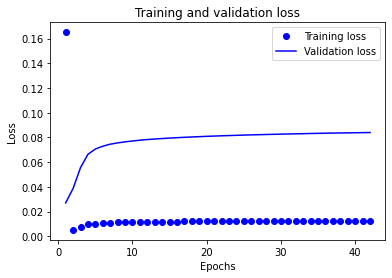

In [ ]:
 import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
history.history['val_loss'],history.history['loss']

([0.02704244665801525,
  0.038721803575754166,
  0.05558792129158974,
  0.06632727384567261,
  0.07065605372190475,
  0.07290501147508621,
  0.07453479617834091,
  0.07559496909379959,
  0.07643455266952515,
  0.07712847739458084,
  0.07776586711406708,
  0.07830311357975006,
  0.07871628552675247,
  0.07911626994609833,
  0.07947582751512527,
  0.07980591058731079,
  0.0801079124212265,
  0.08038653433322906,
  0.08064036071300507,
  0.08088713884353638,
  0.08111187815666199,
  0.0813288614153862,
  0.08152345567941666,
  0.08170715719461441,
  0.08191163837909698,
  0.08207331597805023,
  0.08222422748804092,
  0.08237617462873459,
  0.08252759277820587,
  0.0826810896396637,
  0.08280187845230103,
  0.08292432129383087,
  0.0830477923154831,
  0.08318894356489182,
  0.08330877125263214,
  0.08342814445495605,
  0.08353198319673538,
  0.08362102508544922,
  0.08371003717184067,
  0.08379894495010376,
  0.08388768136501312,
  0.08398447930812836],
 [0.16513243317604065,
  0.005161795

In [ ]:
test_loss,test_acu = model.evaluate(X_test, y_test)

2671/2671 [==============================] - 5s 2ms/step - loss: 0.0265 - accuracy: 0.9987


In [ ]:
model.predict(X_test)

array([[7.612064e-10],
       [7.612064e-10],
       [7.612064e-10],
       ...,
       [7.612064e-10],
       [7.612064e-10],
       [7.612064e-10]], dtype=float32)